## Exp1 proteome coverage analysis 

**Evaluating wide window DIA with and without FAIMS**

In [1]:
#Importing packages 
import pandas as pd 
import numpy as np
import os 
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt
import umap
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import mstats
import dask.dataframe as dd
sns.set_style("ticks")

myColors = ["#7400b8","#6930c3","#5e60ce","#5390d9","#4ea8de","#48bfe3","#56cfe1","#64dfdf","#72efdd","#80ffdb"]

/Users/valdemaras/Programs/miniconda/miniconda3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
#Importing data 
df = pd.read_csv("data/Exp1/Exp1_stats.txt",sep = "\t",  thousands =".") 
#Extracting the required information from the file name
df['Load'] =  df.iloc[:,0].str.extract(r'test1_(.*?)_')[0].values
df['IT'] =  df.iloc[:,0].str.extract(r'100ms_(.*?)_')[0].values
df['Window'] =  df.iloc[:,0].str.extract(r'IT_(.*?)_')[0].values
df['FAIMS'] = df.iloc[:,0].str.contains(r'noFAIMS').values == False

df

,Unnamed: 0,Precursors,Peptides,Protein Groups,Median FWHM,Median Peak Width,Data Points per Peak (MS1),Data Points per Peak (MS2),Load,IT,Window,FAIMS
0,Exp1\20240206_113012_Exp1_FAIMS_1000pg_12ms\Ru...,17919,17660,3760,"0,046017","0,077994",7,7,1ng,12msIT,13p6mz,True
1,Exp1\20240206_113012_Exp1_FAIMS_1000pg_12ms\Ru...,17888,17628,3755,"0,046013","0,077988",7,7,1ng,12msIT,13p6mz,True
2,Exp1\20240206_113012_Exp1_FAIMS_1000pg_12ms\Ru...,17946,17686,3756,"0,046056","0,07806",7,7,1ng,12msIT,13p6mz,True
3,Exp1\20240206_114819_Exp1_FAIMS_1000pg_24ms\Ru...,18618,18323,3900,"0,04621","0,078322",7,7,1ng,24msIT,27p2mz,True
4,Exp1\20240206_114819_Exp1_FAIMS_1000pg_24ms\Ru...,18652,18355,3900,"0,046639","0,079048",7,7,1ng,24msIT,27p2mz,True
...,...,...,...,...,...,...,...,...,...,...,...,...
90,Exp1\20240206_221021_Exp1_noFAIMS_500pg_3ms\Ru...,6201,6142,1271,"0,054824","0,092921",6,6,500pg,3msIT,3p4mz,False
91,Exp1\20240206_221021_Exp1_noFAIMS_500pg_3ms\Ru...,6195,6136,1263,"0,054066","0,091636",6,6,500pg,3msIT,3p4mz,False
92,Exp1\20240206_223041_Exp1_noFAIMS_500pg_6ms\Ru...,8447,8366,1698,"0,051971","0,088085",7,7,500pg,6msIT,6p8mz,False
93,Exp1\20240206_223041_Exp1_noFAIMS_500pg_6ms\Ru...,8403,8323,1694,"0,051569","0,087405",7,7,500pg,6msIT,6p8mz,False


[Text(0.5, 1.0, '250pg')]

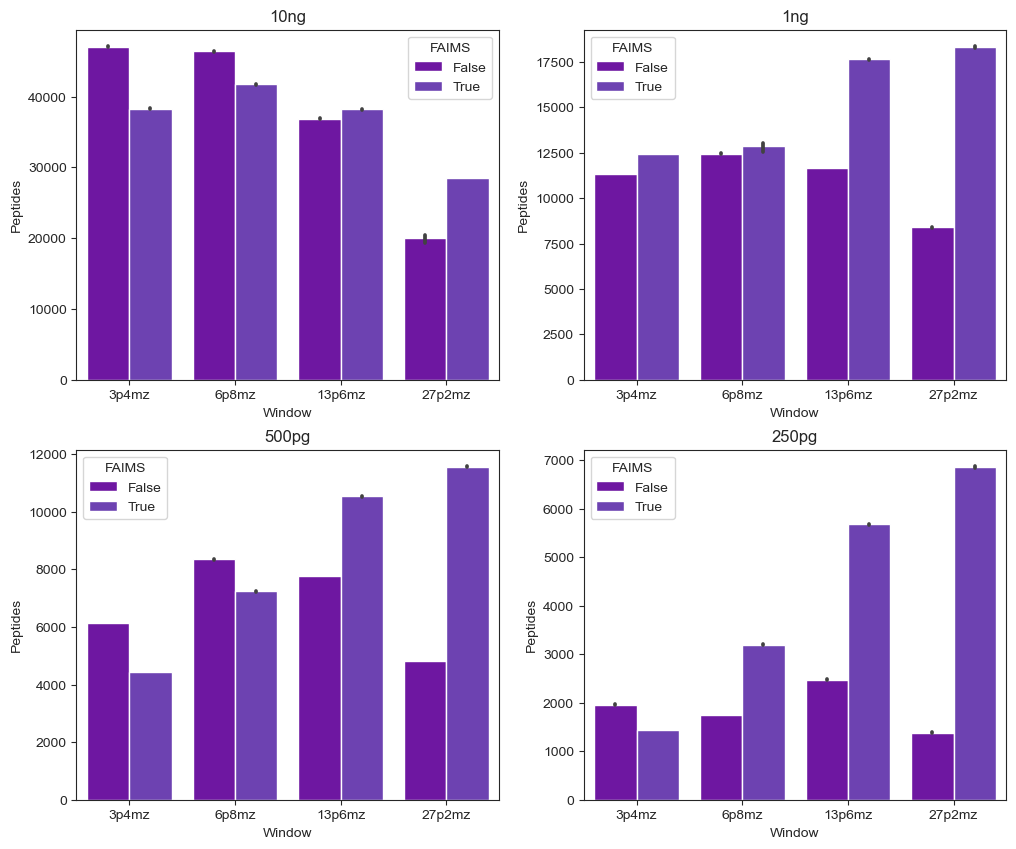

In [3]:
# Plotting the coverage 
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
fig, ax = plt.subplots(2,2,figsize=(12,10))
sns.barplot(data = df[df.Load == "10ng"], x = "Window", y = "Peptides", hue = "FAIMS", ax = ax[0,0], palette = myColors, order =  myOrder).set(title="10ng")
sns.barplot(data = df[df.Load == "1ng"], x = "Window", y = "Peptides", hue = "FAIMS", ax = ax[0,1], palette = myColors, order =  myOrder).set(title="1ng")
sns.barplot(data = df[df.Load == "500pg"], x = "Window", y = "Peptides", hue = "FAIMS", ax = ax[1,0], palette = myColors, order =  myOrder).set(title="500pg")
sns.barplot(data = df[df.Load == "250pg"], x = "Window", y = "Peptides", hue = "FAIMS", ax = ax[1,1], palette = myColors, order =  myOrder).set(title="250pg")

[Text(0.5, 1.0, '250pg')]

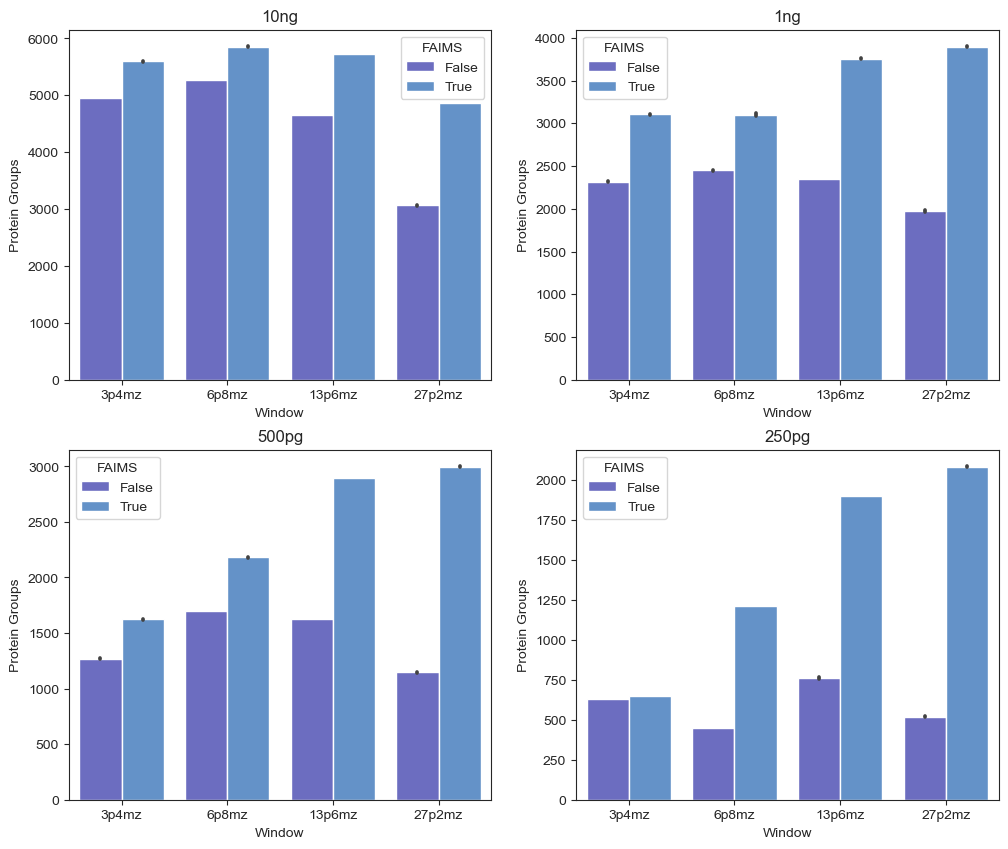

In [4]:
# Plotting the coverage 
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
fig, ax = plt.subplots(2,2,figsize=(12,10))
sns.barplot(data = df[df.Load == "10ng"], x = "Window", y = "Protein Groups", hue = "FAIMS", ax = ax[0,0], palette = myColors[2:], order =  myOrder).set(title="10ng")
sns.barplot(data = df[df.Load == "1ng"], x = "Window", y = "Protein Groups", hue = "FAIMS", ax = ax[0,1], palette = myColors[2:], order =  myOrder).set(title="1ng")
sns.barplot(data = df[df.Load == "500pg"], x = "Window", y = "Protein Groups", hue = "FAIMS", ax = ax[1,0], palette = myColors[2:], order =  myOrder).set(title="500pg")
sns.barplot(data = df[df.Load == "250pg"], x = "Window", y = "Protein Groups", hue = "FAIMS", ax = ax[1,1], palette = myColors[2:], order =  myOrder).set(title="250pg")

In [5]:
# Converting to perfentage gains based on minimal value 

#df['Peptides_gain_FAIMS'] = df.groupby(['Load', 'FAIMS'])['Peptides'].transform(lambda x: x/x.min() * 100)
df['Peptides_gain_FAIMS'] = df.groupby(['Load', 'FAIMS'])['Peptides'].transform(lambda x: x / df[(df['Window'] == '3p4mz') & (df['Load'] == x.name[0]) & (df['FAIMS'] == x.name[1])]['Peptides'].mean())
df['ProteinGroups_gain_FAIMS'] = df.groupby(['Load', 'FAIMS'])['Protein Groups'].transform(lambda x: x / df[(df['Window'] == '3p4mz') & (df['Load'] == x.name[0]) & (df['FAIMS'] == x.name[1])]['Protein Groups'].mean())

[Text(0.5, 1.0, '250pg')]

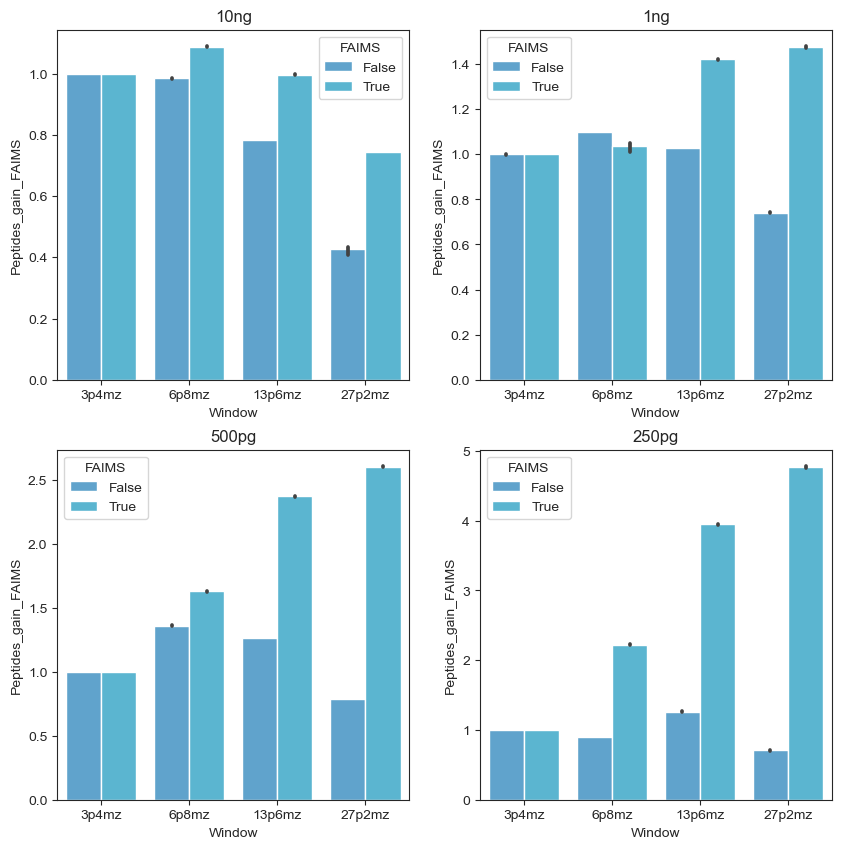

In [6]:
# Plotting the coverage 
myOrder = ['3p4mz', '6p8mz', '13p6mz', '27p2mz']
fig, ax = plt.subplots(2,2,figsize=(10,10))
sns.barplot(data = df[df.Load == "10ng"], x = "Window", y = "Peptides_gain_FAIMS", hue = "FAIMS", ax = ax[0,0], palette = myColors[4:], order =  myOrder).set(title="10ng")
sns.barplot(data = df[df.Load == "1ng"], x = "Window", y = "Peptides_gain_FAIMS", hue = "FAIMS", ax = ax[0,1], palette = myColors[4:], order =  myOrder).set(title="1ng")
sns.barplot(data = df[df.Load == "500pg"], x = "Window", y = "Peptides_gain_FAIMS", hue = "FAIMS", ax = ax[1,0], palette = myColors[4:], order =  myOrder).set(title="500pg")
sns.barplot(data = df[df.Load == "250pg"], x = "Window", y = "Peptides_gain_FAIMS", hue = "FAIMS", ax = ax[1,1], palette = myColors[4:], order =  myOrder).set(title="250pg")

In [7]:
#df.to_csv("data/Exp1/output/coverage.txt", sep ="\t", index = False)